This is a toy example of the use of Ball Mapper. We will start by constructing a collection of points sampled from a unit circle.

This notebook was prepared by Davide Gurnari. 

In [1]:
# uncomment and run this if you are on colab
# !pip install pyballmapper

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [3]:
pointcloud = np.array([[np.cos(x), np.sin(x)] for x in np.arange(0, 6.3, 0.1)])
points_df = pd.DataFrame(pointcloud, columns=['x', 'y'])
points_df.head()

,x,y
0,1.000000,0.000000
1,0.995004,0.099833
2,0.980067,0.198669
3,0.955336,0.295520
4,0.921061,0.389418


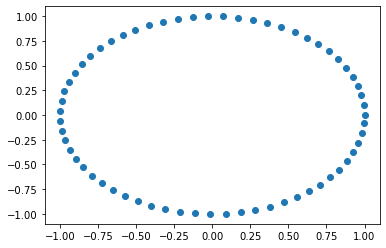

In [4]:
plt.scatter(points_df.x, points_df.y)

## Create BallMapper graph

In [5]:
from pyballmapper import BallMapper

In [6]:
bm = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                epsilon = 0.25)            # the radius of the balls

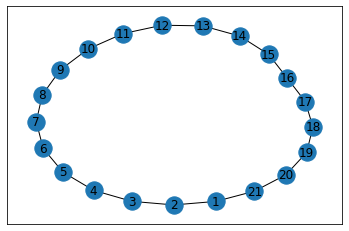

In [7]:
# bm.Graph is a networkx graph
nx.draw_networkx(bm.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24))

In [8]:
bm.Graph.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21))

In [9]:
# each node stores the indices of the points inside it
print(bm.points_covered_by_landmarks[1])

[0, 1, 2, 61, 62]


## BM with reverse ordering

In [10]:
# we can change the order of the points 
# this will affect the landmarks selection
bm_reverse = BallMapper(points = points_df.values, # the pointcloud, as a numpy array
                        epsilon = 0.25,            # the radius of the balls
                        order = list(reversed(range(len(points_df.values)))) # reverse ordering
                       ) 

In [11]:
for idx in [1, 2]:
    print('BM')
    print('the landmark of cluster {} in BM is {}'.format(idx, bm.Graph.nodes[idx]))
    print('it covers the points {}'.format(bm.points_covered_by_landmarks[idx]))
    print()
    print('BM reversed')
    print('the landmark of cluster {} in BM reverse is {}'.format(idx, bm_reverse.Graph.nodes[idx]))
    print('it covers the points {}'.format(bm_reverse.points_covered_by_landmarks[idx]))
    print('\n\n')

BM
the landmark of cluster 1 in BM is {'landmark': 0, 'points covered': [0, 1, 2, 61, 62], 'size': 5, 'color': 'r'}
it covers the points [0, 1, 2, 61, 62]

BM reversed
the landmark of cluster 1 in BM reverse is {'landmark': 62, 'points covered': [62, 61, 60, 1, 0], 'size': 5, 'color': 'r'}
it covers the points [62, 61, 60, 1, 0]



BM
the landmark of cluster 2 in BM is {'landmark': 3, 'points covered': [1, 2, 3, 4, 5], 'size': 5, 'color': 'r'}
it covers the points [1, 2, 3, 4, 5]

BM reversed
the landmark of cluster 2 in BM reverse is {'landmark': 59, 'points covered': [61, 60, 59, 58, 57], 'size': 5, 'color': 'r'}
it covers the points [61, 60, 59, 58, 57]





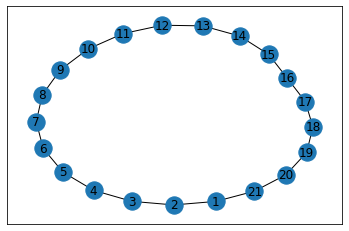

In [12]:
# but the shape of the graph is the same
nx.draw_networkx(bm_reverse.Graph, 
                 pos=nx.spring_layout(bm.Graph, seed=24))

## Colored Ball Mapper graph

In [13]:
from matplotlib.colors import ListedColormap
from matplotlib import cm

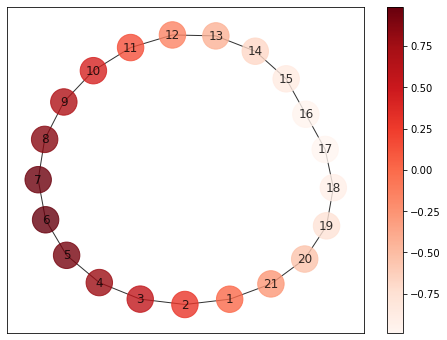

In [14]:
# we use the points themself as coloring functions
bm.add_coloring(coloring_df=points_df)

# we can color the graph by any column in coloring_df
# here we adopt a standard colour palette
my_red_palette = cm.get_cmap(name='Reds')

plt.figure(figsize= (8,6))
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networx(coloring_variable='y', color_palette=my_red_palette, colorbar=True)
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Fancy visualizations using Bokeh
https://docs.bokeh.org/en/latest/docs/installation.html

In [16]:
from pyballmapper.plotting import graph_GUI

In [17]:
from bokeh.plotting import figure, show, output_file, save

In [22]:
# create a GUI with input our BM graph, 
# we need color palette 
my_red_palette = cm.get_cmap(name='Reds')

# and a dataframe with coloring functions (one value per point in the pointcloud)
# we use the points themself as coloring functions
bm.add_coloring(coloring_df=points_df)
my_fancy_gui = graph_GUI(bm.Graph, my_red_palette, tooltips_variables=['x','y'])
my_fancy_gui.color_by_variable('y')

color by variable y 
MIN_VALUE: -0.986, MAX_VALUE: 0.988


(-0.9862311514641753, 0.9875482631007362)

In [23]:
# creates an html file with the graph 
# and opens it in another tab
show(my_fancy_gui.plot)

In [ ]:
# if you are on colab
# save the output html and download it  
output_file("circle_BM.html")
save(my_fancy_gui.plot)